# Метод Монте-Карло для модели случайных блужданий

### Одномерное дискретное случайное блуждание
На отрезке $[a, b]$ задана точка $x$ ($a<x<b$), задана вероятность $p$ перехода точки вправо. В момент времени $i$, точка совершает переход направо (с вероятностью $р$ или налево (с вероятностью $1 - р$). Процесс останавливается, когда точка достигает точки $a$ или точки $b$. Назовём точки $a$, $b$ поглощающими состояниями.

Два стандартных вопроса, на которые должна отвечать модель случайных блужданий $-$ чему равна вероятность попадания в каждое из поглощающих состояний, и чему равно среднее время блуждания до попадания в какое-нибудь из поглощающих состояний?

### Метод Монте-Карло

Рассмотрим $N$ частиц, совершающих случайные блуждания, начиная с заданной точки $x$. Дождемся, когда все эти частицы закончат движение, и посчитаем частоты попадания в каждое из поглощающих состояний и среднее время блужданий частиц (то есть среднее количество шагов, совершенных каждой частицей до попадания в поглощающее состояние). Это и будет приближенным ответом на поставленные вопросы.

### Программа

В файле *main.c* реализован параллельный метод Монте-Карло для модели случайных блужданий с помощью *OpenMP*.

Программа принимает на вход целочисленные $а$, $b$, $x$, $N$‚ вещественный параметр $p$, число потоков $P$.

В файле *stats.txt* записаны полученные данные (вероятность достижения состояния $b$ и среднее количество шагов, совершенных каждой частицей до попадания в поглощающее состояние), время работы основного цикла программы $T$, а так же все параметры запуска.

Пример:

Произведем запуск нри $Р = 1, 2, 3, 4, 5, 6$.

Параметры ЭВМ, на которой производится запуск:

Будем запускать нашу программу с параметрами $a = 0, \; b = 100, \; x = 50, \;p = 0.5$. Пусть $P_{theoretical} = 0.5$ $-$ теоретическое значение достижения частицей точки $b$ при данных параметрах, $P_{exerimental}(N)$ $-$ значение, вычисленное программой.
Составим график зависимости $T(N),\;|P_{theoretical} - P_{exerimental}(N)|$ при фиксированном значении $Р$.

In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 0
b = 100
x = 50
p = 0.5
P_values = [1, 2, 3, 4, 5, 6, 8, 16]
N_values = [30, 50, 100, 500, 1000, 3000, 5000, 10000, 20000, 30000, 40000, 50000]
get_new_data = "YES"  # "YES" if you want to generate new stats

In [2]:
if get_new_data == "YES":
    subprocess.call("rm stats*.txt", shell=True)
    print("Old stats are deleted! Starting generation of new stats...")
    for P in P_values:
        print("Stats for {} threads:".format(P), end=" ")
        for N in N_values:
            subprocess.call(list(map(str ,["./run", a, b, x, N, p, P, "stats{}.txt".format(P)])))
            print("N={}".format(N), end=" ")
        print()
    print("New stats are successfully generated!")

Old stats are deleted! Starting generation of new stats...
Stats for 1 threads: N=30 N=50 N=100 N=500 N=1000 N=3000 N=5000 N=10000 N=20000 N=30000 N=40000 N=50000 
Stats for 2 threads: N=30 N=50 N=100 N=500 N=1000 N=3000 N=5000 N=10000 N=20000 N=30000 N=40000 N=50000 
Stats for 3 threads: N=30 N=50 N=100 N=500 N=1000 N=3000 N=5000 N=10000 N=20000 N=30000 N=40000 N=50000 
Stats for 4 threads: N=30 N=50 N=100 N=500 N=1000 N=3000 N=5000 N=10000 N=20000 N=30000 N=40000 N=50000 
Stats for 5 threads: N=30 N=50 N=100 N=500 N=1000 N=3000 N=5000 N=10000 N=20000 N=30000 N=40000 N=50000 
Stats for 6 threads: N=30 N=50 N=100 N=500 N=1000 N=3000 N=5000 N=10000 N=20000 N=30000 N=40000 N=50000 
Stats for 8 threads: N=30 N=50 N=100 N=500 N=1000 N=3000 N=5000 N=10000 N=20000 N=30000 N=40000 N=50000 
Stats for 16 threads: N=30 N=50 N=100 N=500 N=1000 N=3000 N=5000 N=10000 N=20000 N=30000 N=40000 N=50000 
New stats are successfully generated!


In [3]:
T = [[0] * len(N_values) for i in range(len(P_values))]
P_experimental = [[0] * len(N_values) for i in range(len(P_values))]
for P in P_values:
    with open("stats{}.txt".format(P)) as file:
        for line in file:
            if "//" in line:
                continue
            line = line.split()
            N = int(line[6])
            P_experimental[P_values.index(P)][N_values.index(N)] = float(line[0])
            T[P_values.index(P)][N_values.index(N)] = float(line[2].split("s")[0])

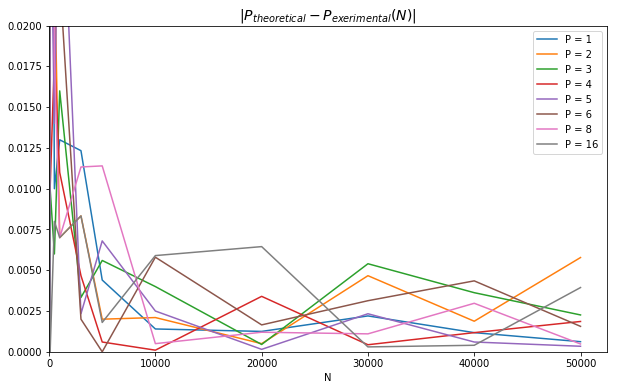

In [4]:
plt.figure(figsize=(10, 6))
for P in P_values:
    plt.plot(N_values, np.abs(0.5 - np.array(P_experimental[P_values.index(P)])), label="P = {}".format(P))
plt.title(r"$|P_{theoretical} - P_{exerimental}(N)|$", fontsize=14)
plt.xlabel("N")
plt.xlim(0)
plt.ylim(0, 0.02)
plt.legend()
plt.show()

По построенному графику можно утверждать, что отклонение померянного значения от теоретического достаточно мало. Главная причина погрешности метода Монте-Карло, видимо, заключается в генераторе псевдо-рамномных чисел, поэтому
по построенным графикам теоретически можно оценить насколько случайна выбрана функция случайного равномерного распределения на отрезке $[0, 1]$. Причем видно, что величина $|P_{theoretical} - P_{exerimental}(N)|$ никак не коррелирует с числом потоков.

Теперь перейдем непосредственно к изучению поведения данной программы в многопоточной среде.

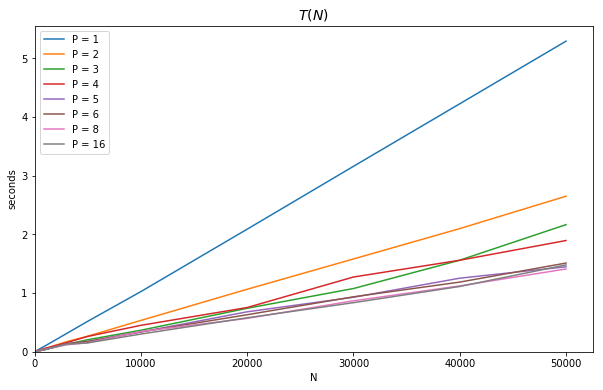

In [5]:
plt.figure(figsize=(10, 6))
for P in P_values:
    plt.plot(N_values, np.array(T[P_values.index(P)]), label="P = {}".format(P))
plt.title(r"$T(N)$", fontsize=14)
plt.xlabel("N")
plt.ylabel("seconds")
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()

На основании полученной зависимости $T(N)$ для каждого фиксированного $P$ можно заметить, что при достаточно больших $N$ (например $N \ge 20000$) общее время вычислений ведет себя линейно от количества блуждающих частиц.

Теперь выберем некоторое достаточно большое фиксированное значение $N = 50000$ и изучим зависимости $T(P), \; S(P),\; E(P)$.

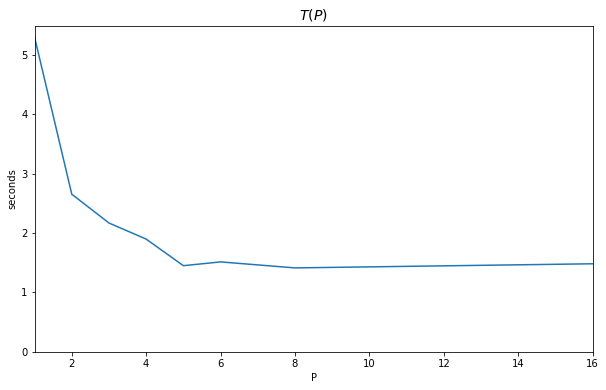

In [6]:
N = N_values[-1]

plt.figure(figsize=(10, 6))
plt.plot(P_values, [T[i][N_values.index(N)] for i in range(len(P_values))])
plt.title(r"$T(P)$", fontsize=14)
plt.xlabel("P")
plt.ylabel("seconds")
plt.xlim(1, P_values[-1])
plt.ylim(0)
plt.show()

Можно заметить, что при увеличении количества потоков с $1$ до $4$ земетно уменьшается время вычислений. Однако при $P>4$ время выполнения программы перестает уменьшатся, что связано с количеством ядер ($4$) на выполняемой машине.

Исследуем зависимоcти величин ускорения $S(P) = \frac{T(1)}{T(P)}$ и эффективности $E(P) = \frac{S(P)}{P}$.

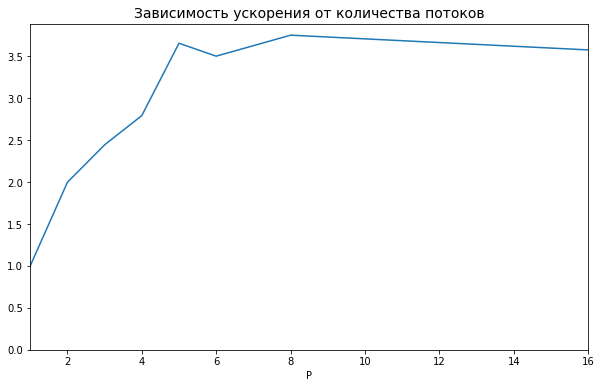

In [7]:
S = T[0][N_values.index(N)] / np.array([T[i][N_values.index(N)] for i in range(len(P_values))])
plt.figure(figsize=(10, 6))
plt.plot(P_values, S)
plt.title(u"Зависимость ускорения от количества потоков", fontsize=14)
plt.xlabel("P")
plt.xlim(1, P_values[-1])
plt.ylim(0)
plt.show()

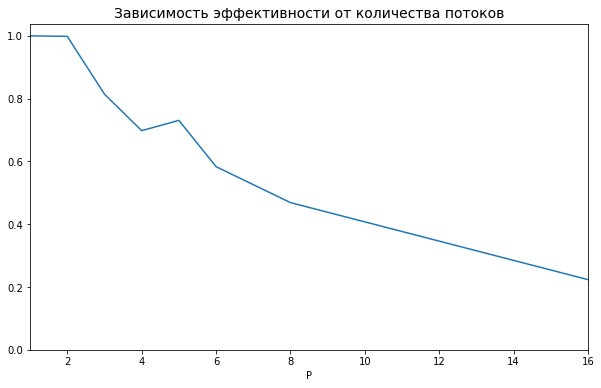

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(P_values, S / np.array(P_values))
plt.title(u"Зависимость эффективности от количества потоков", fontsize=14)
plt.xlabel("P")
plt.xlim(1, P_values[-1])
plt.ylim(0)
plt.show()

Как мы видим, эффективность выполнения программы резко спадает при количестве потоков большем, чем количество ядер процессора.

Теперь для $P=4$ потоков исследуем зависимоти $S(N)$ и $E(N)$.

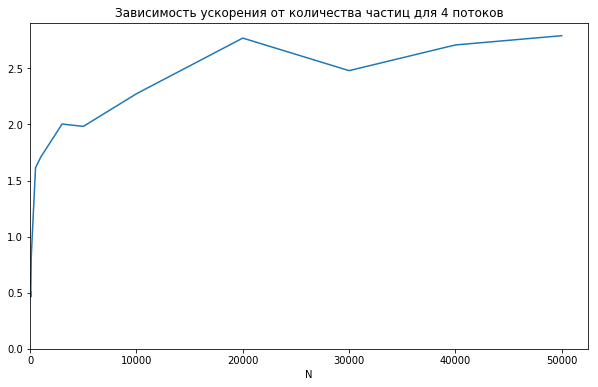

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, [T[0][i] / T[P_values.index(4)][i] for i in range(len(N_values))])
plt.title(u"Зависимость ускорения от количества частиц для 4 потоков", fontsize=12)
plt.xlabel("N")
plt.xlim(0)
plt.ylim(0)
plt.show()

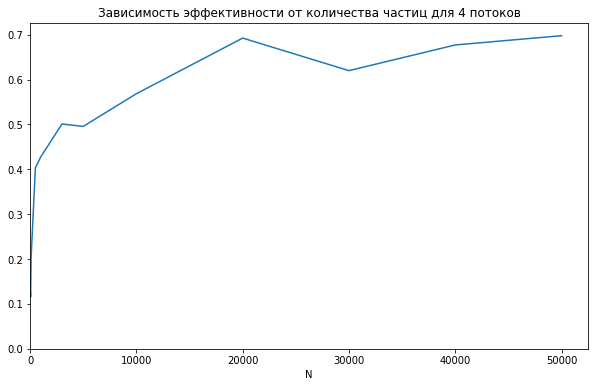

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, [T[0][i] / T[P_values.index(4)][i] / 4 for i in range(len(N_values))])
plt.title(u"Зависимость эффективности от количества частиц для 4 потоков", fontsize=12)
plt.xlabel("N")
plt.xlim(0)
plt.ylim(0)
plt.show()

Как мы видим, эффективность использования многопоточности возрастает от 0 до почти 1 с увеличением числа частиц, что объясняется затрачиванием ресурсов на создание новых потоков.